# Gray-Scott reaction–diffusion equation
> Pattern formation in reaction-diffusion systems.

- toc: true 
- badges: true
- comments: true
- categories: [jupyter]

The reaction we are modeling is between two generic chemical species u and v such that

$$
u + 2v \rightarrow 3v
$$

and $v$ goes to an inert product.

The overall behavior can be modelled using partial differential equations, named as Gray-Scott reaction-diffusion equation [1], 

$$
\frac{\partial u}{\partial t} = \underbrace{D_u \boldsymbol\nabla^2 u}_{\substack{\text{diffuse }u\\\text{ for concentration to spread}}} - \underbrace{uv^2}_{\text{probability of reaction}} + \underbrace{F(1-u)}_{\substack{\text{add more of u }  \\\text{with a bound 1}}}
$$
$$
\frac{\partial v}{\partial t} = \underbrace{D_v \boldsymbol\nabla^2 v}_{\substack{\text{diffuse }v\\\text{ for concentration to spread}}} + \underbrace{uv^2}_{\text{probability of reaction}} - \underbrace{(F+K)v}_{\substack{\text{remove } v \text{ from reaction}  \\\text{  with a bound 0}}}
$$

The system shows very rich set of patterns as the parameters for equations are varied.

[1]  P. Gray and S. K. Scott, *Chemical Oscillations and Instabilities: Non-linear Chemical Kinetics*, International Series of Monographs on Chemistry, 1994.

In what follows, we present a numerical implementation of this model.

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from scipy.sparse import spdiags 



class GrayScott():
    """Class to solve Gray-Scott Reaction-Diffusion equation"""
    def __init__(self, N):
        self.N = N
        self.u = np.ones((N, N), dtype=np.float128)
        self.v = np.zeros((N, N), dtype=np.float128)
    
    
    def laplacian(self):
        """Construct a sparse matrix that applies the 5-point discretization"""
        N = self.N
        e=np.ones(N**2)
        e2=([1]*(N-1)+[0])*N
        e3=([0]+[1]*(N-1))*N
        A=spdiags([-4*e,e2,e3,e,e],[0,-1,1,-N,N],N**2,N**2)
        return A


    def initialise(self):
        """Setting up the initial condition"""
        N, N2, r = self.N, np.int(self.N/2), 16
        
        self.u += 0.02*np.random.random((N,N))
        self.v += 0.02*np.random.random((N,N))
        
        self.u[N2-r:N2+r, N2-r:N2+r] = 0.50
        self.v[N2-r:N2+r, N2-r:N2+r] = 0.25
        return  

    
    def integrate(self, Nt, Du, Dv, F, K, L):
        """Integrate the resulting system of equations using the Euler method"""
        u = self.u.reshape((N*N))
        v = self.v.reshape((N*N))

        #evolve in time using Euler method
        for i in range(int(Nt)):
            uvv = u*v*v
            u += (Du*L.dot(u) - uvv +  F *(1-u))
            v += (Dv*L.dot(v) + uvv - (F+K)*v  )
        
        self.u = u
        self.v = v
        return
        
    
    def configPlot(self):
        """Plotting business"""
        u = self.u
        v = self.v
        f = plt.figure(figsize=(25, 10), dpi=400, facecolor='w', edgecolor='k');
        sp =  f.add_subplot(1, 2, 1 );
        plt.pcolor(u.reshape((N, N)), cmap=plt.cm.RdBu)
        plt.axis('tight')

        sp =  f.add_subplot(1, 2, 2 );
        plt.pcolor(v.reshape((N, N)), cmap=plt.cm.RdBu)
        plt.axis('tight')
        plt.show()
        
        
N  = 256    ## grid size (change to smaller number for faster simulations)
Nt = 3.2e4  ## duraction of simulation

### Bacteria

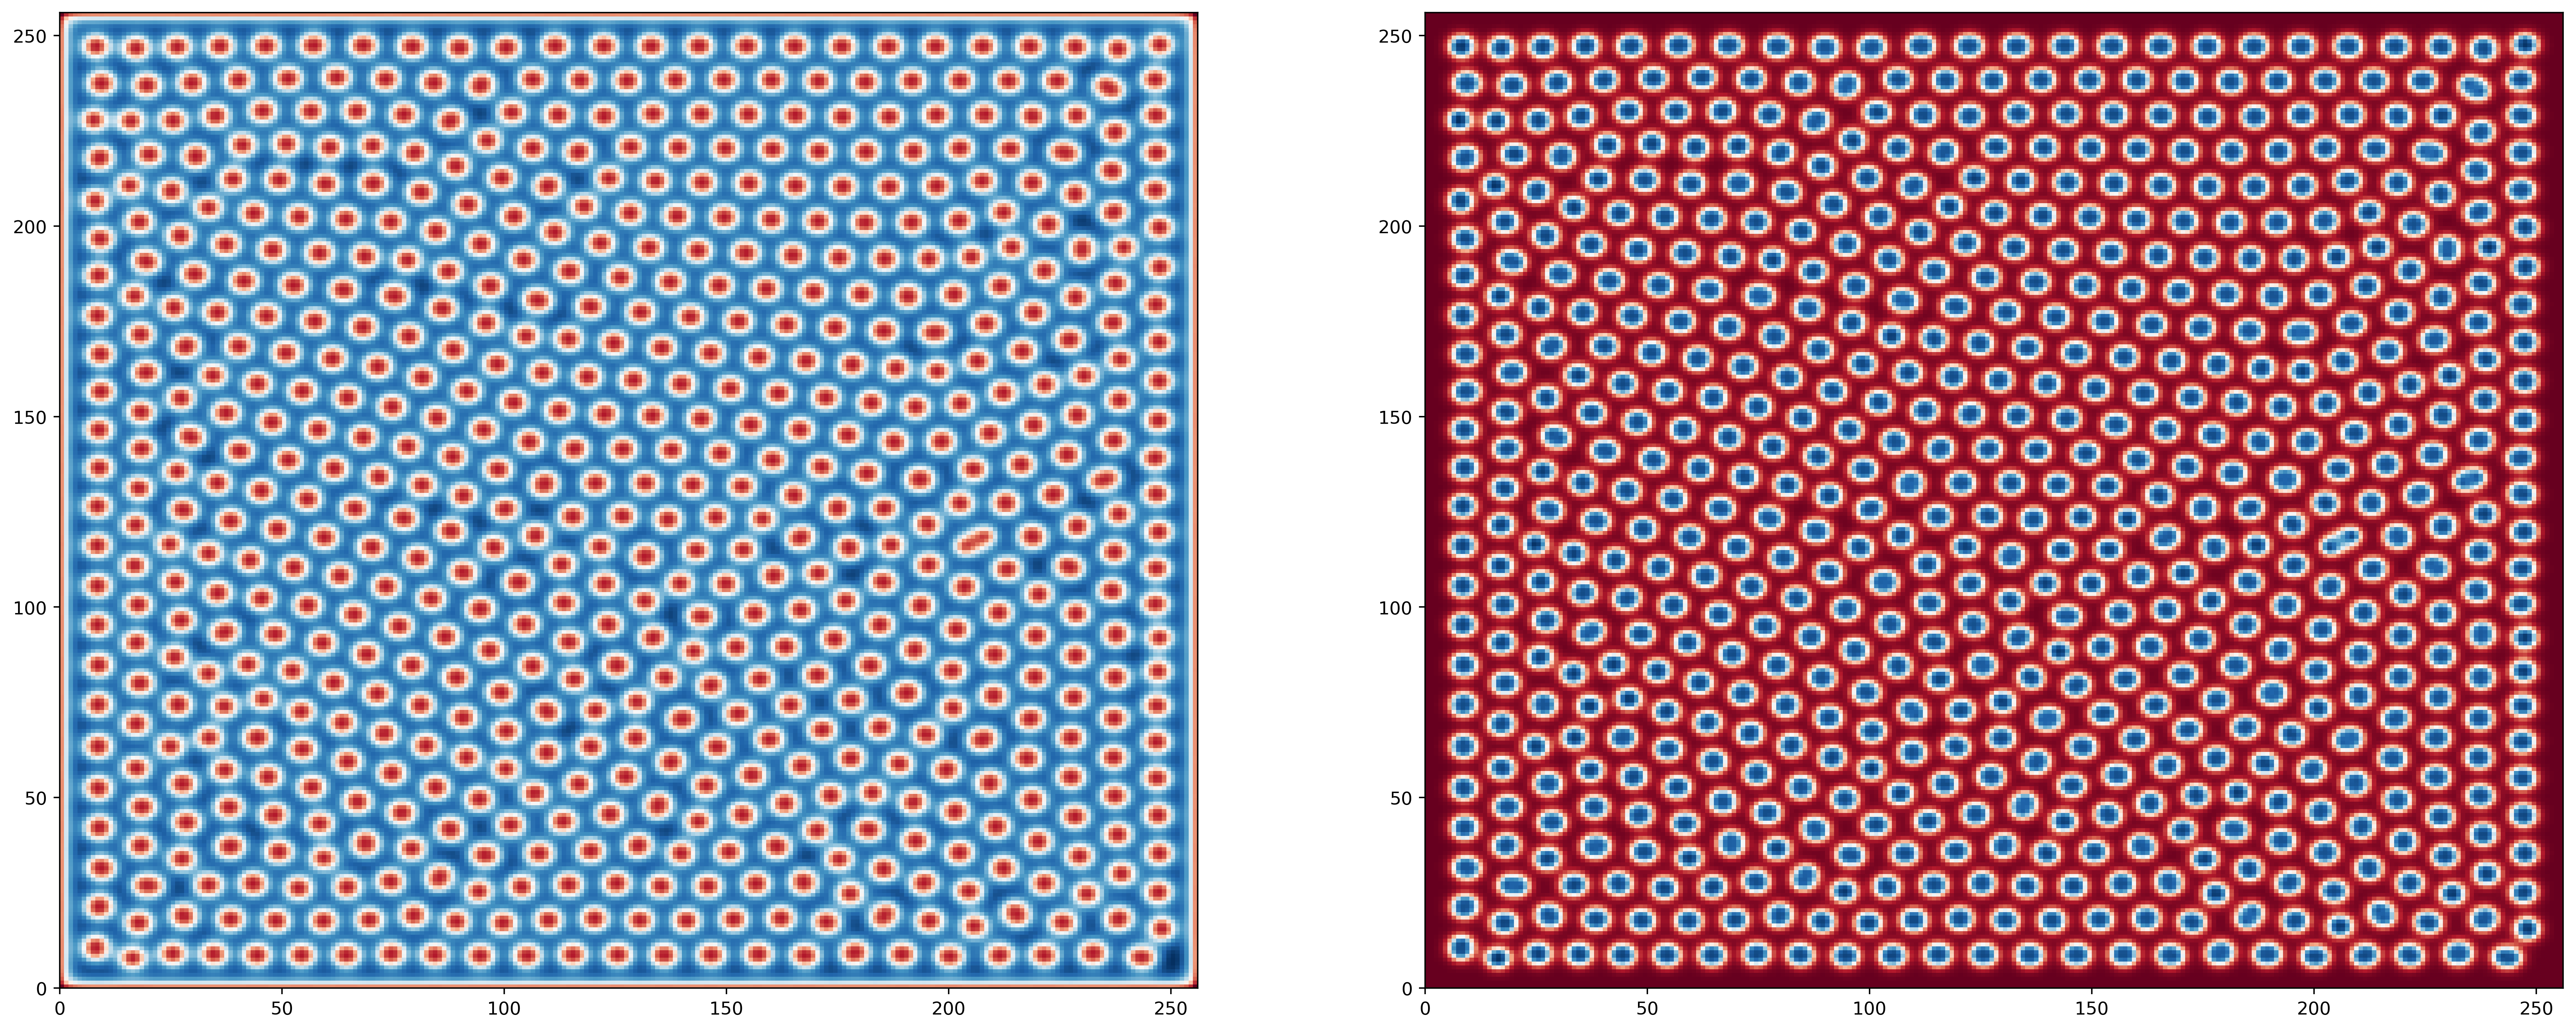

In [2]:
rdSolver = GrayScott(N)
L = rdSolver.laplacian()
Du, Dv, F, K = 0.14, 0.06, 0.035, 0.065

rdSolver.initialise()
rdSolver.integrate(Nt, Du, Dv, F, K, L)
rdSolver.configPlot()

### Coral patterns

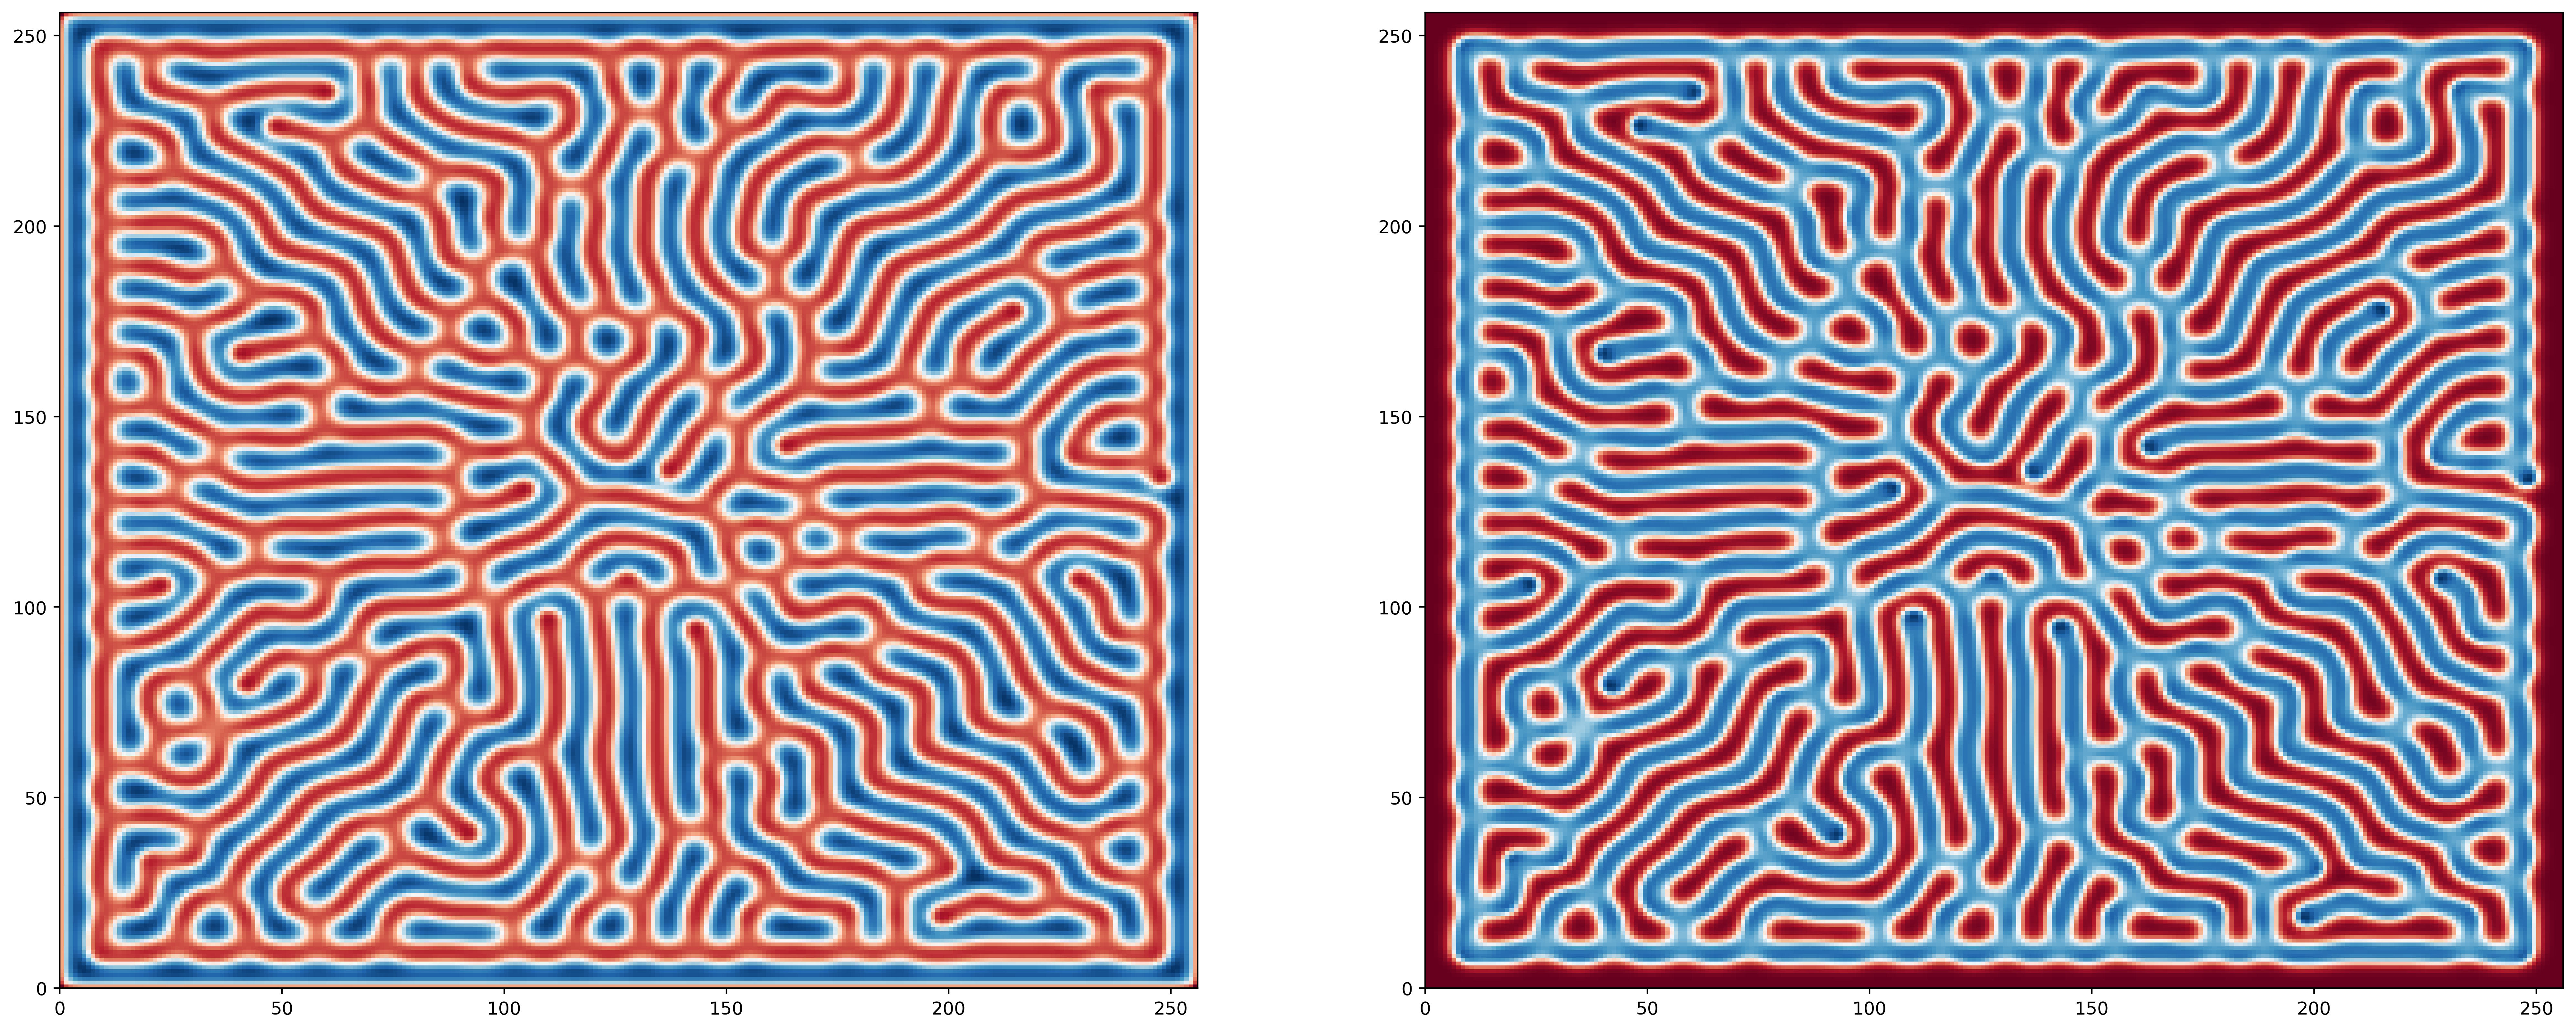

In [3]:
rdSolver = GrayScott(N)
L = rdSolver.laplacian()
Du, Dv, F, K = 0.16, 0.08, 0.060, 0.062 

rdSolver.initialise()
rdSolver.integrate(Nt, Du, Dv, F, K, L)
rdSolver.configPlot()

### Spirals

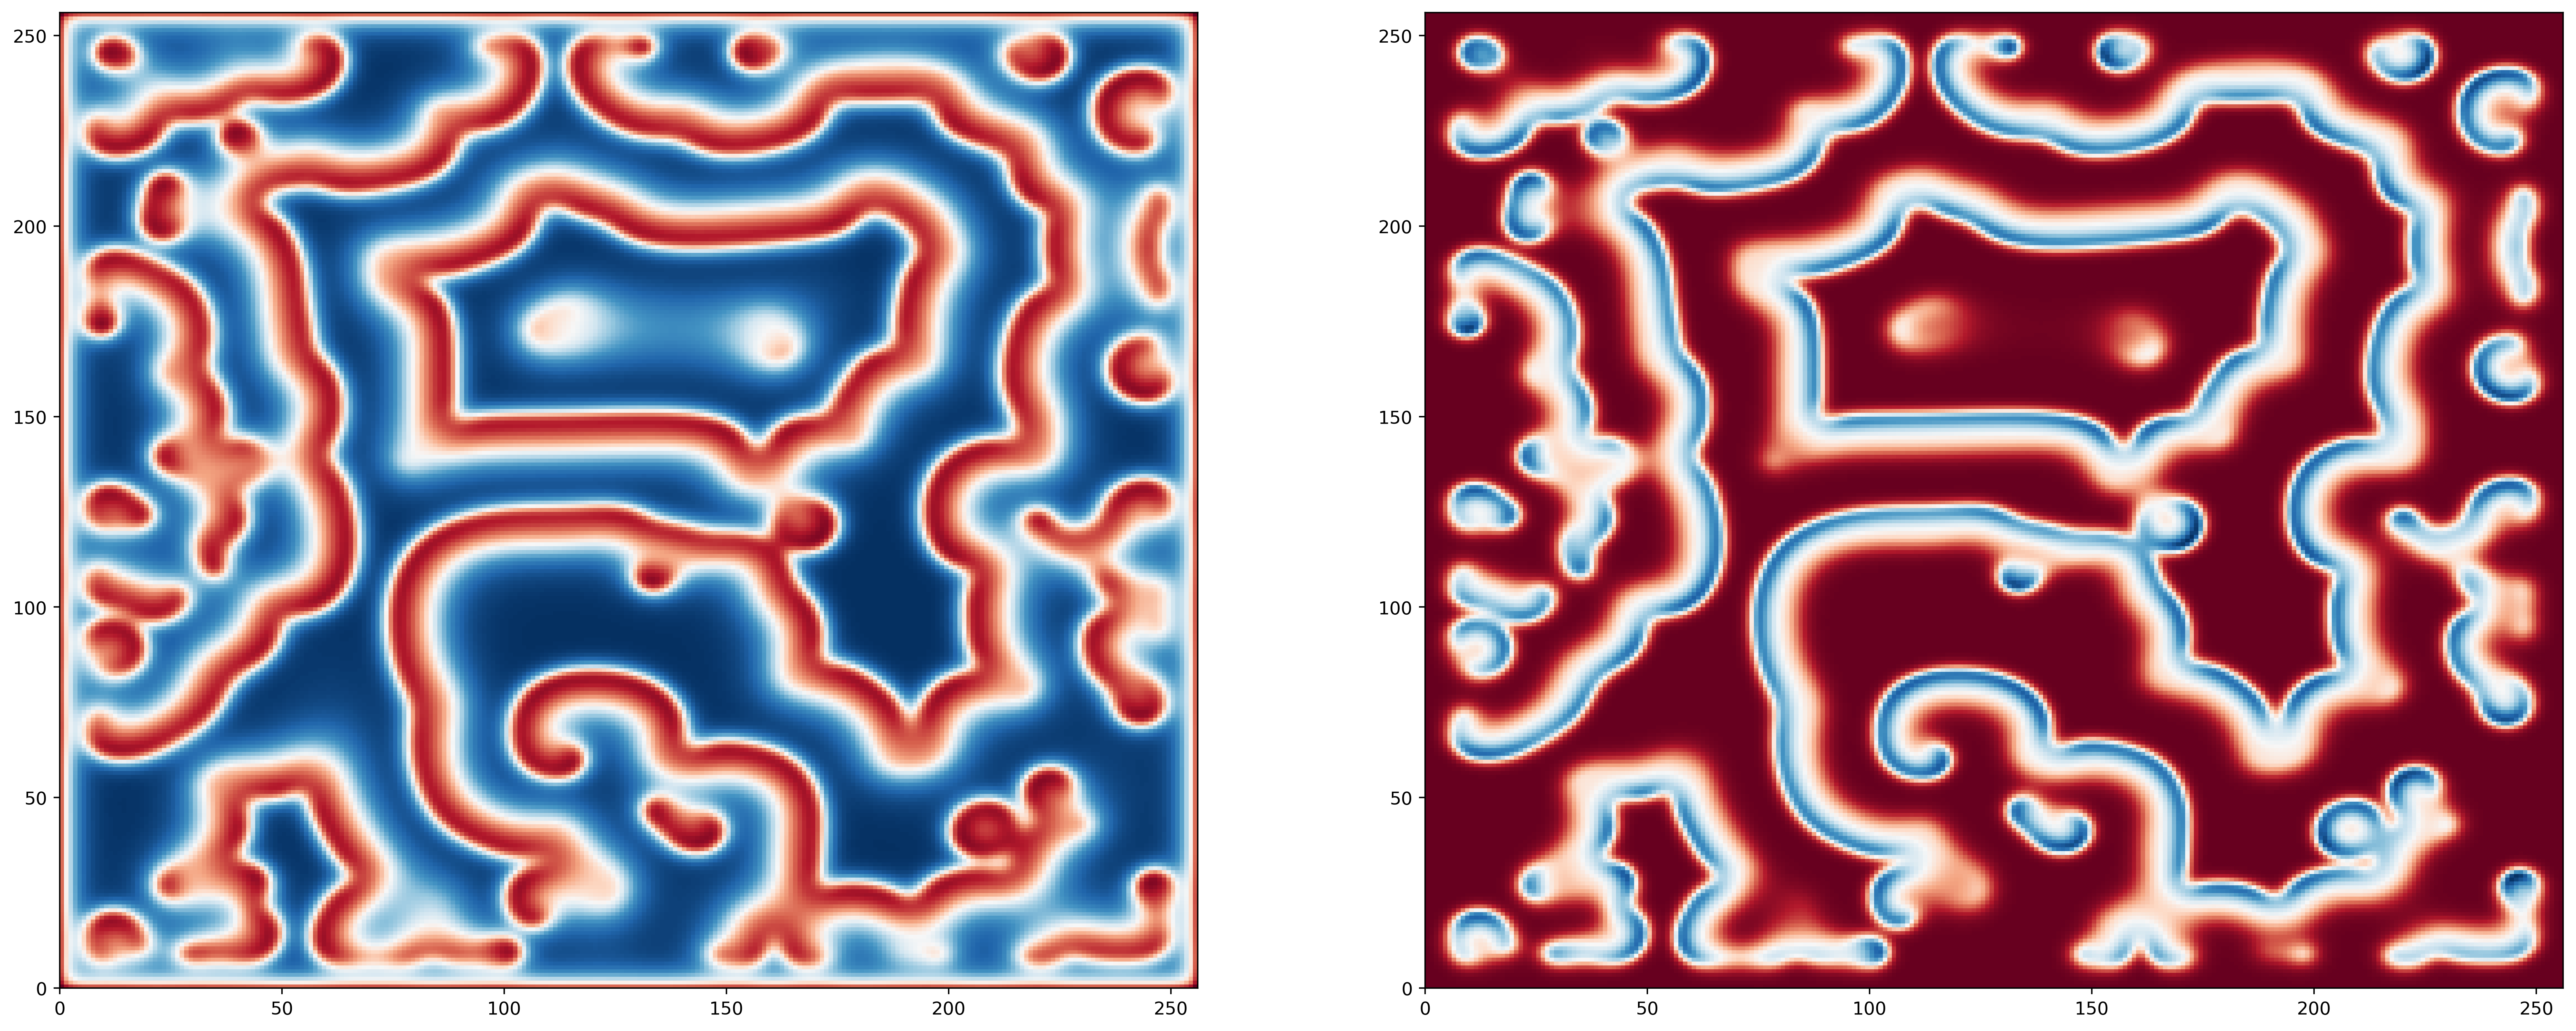

In [4]:
rdSolver = GrayScott(N)
L = rdSolver.laplacian()
Du, Dv, F, K = 0.12, 0.08, 0.020, 0.050

rdSolver.initialise()
rdSolver.integrate(Nt, Du, Dv, F, K, L)
rdSolver.configPlot()

### Zebrafish

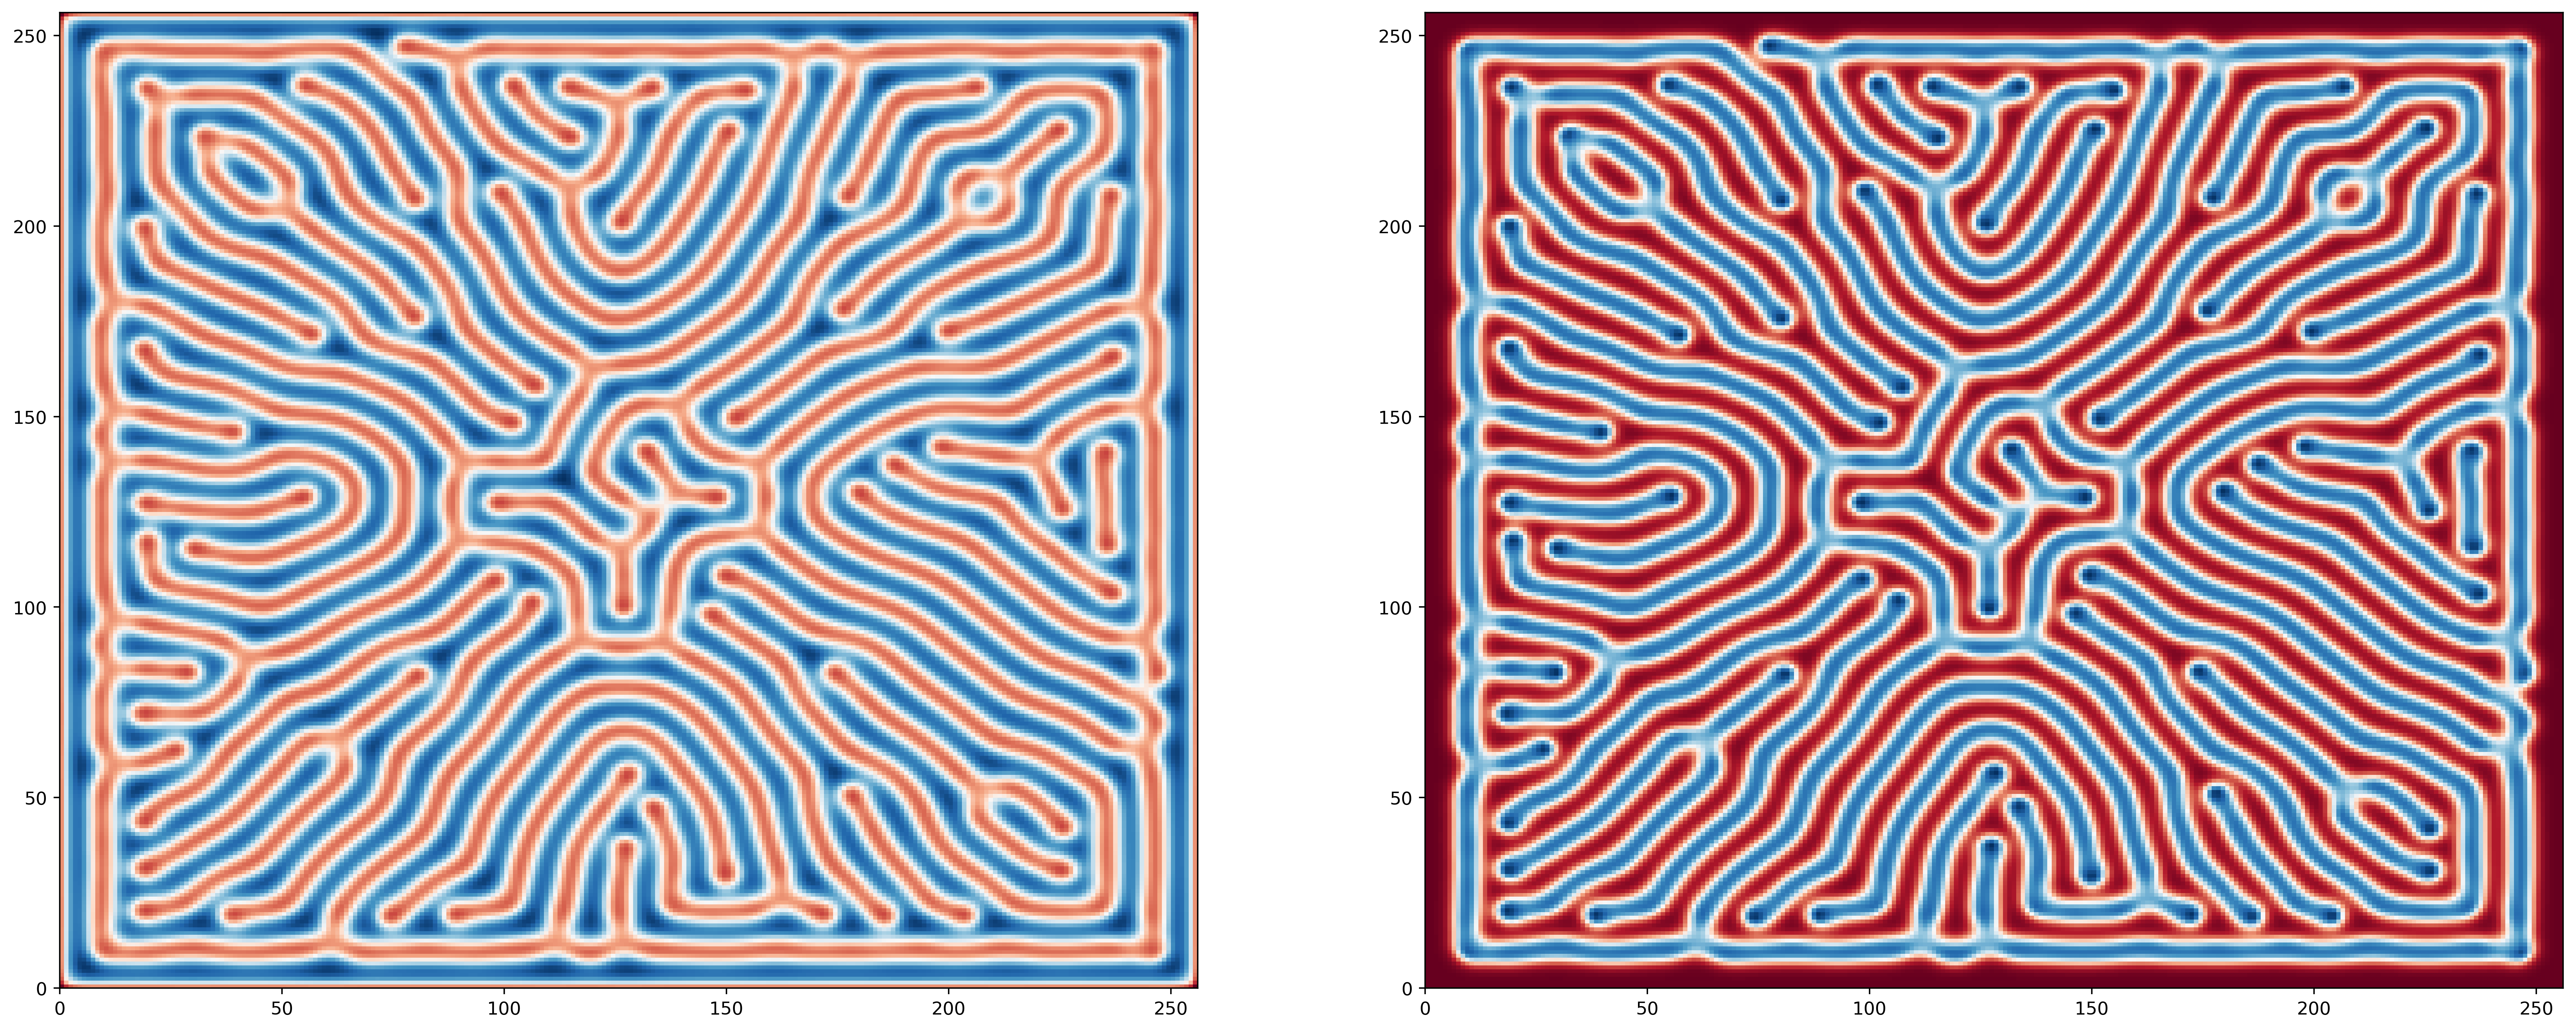

In [5]:
rdSolver = GrayScott(N)
L = rdSolver.laplacian()
Du, Dv, F, K = 0.16, 0.08, 0.035, 0.060

rdSolver.initialise()
rdSolver.integrate(Nt, Du, Dv, F, K, L)
rdSolver.configPlot()